# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [40]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

In [41]:
data = pd.read_csv('data/M7_E1/df_variaveis_dummy,csv')

dummies = pd.DataFrame(data)

types = dummies.dtypes
types.value_counts()
dummies.columns

Index(['Unnamed: 0', 'sexo_F', 'sexo_M', 'posse_de_veiculo_N',
       'posse_de_veiculo_Y', 'posse_de_imovel_N', 'posse_de_imovel_Y',
       'tipo_renda_Commercial associate', 'tipo_renda_Pensioner',
       'tipo_renda_State servant', 'tipo_renda_Student', 'tipo_renda_Working',
       'educacao_Academic degree', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Civil marriage',
       'estado_civil_Married', 'estado_civil_Separated',
       'estado_civil_Single / not married', 'estado_civil_Widow',
       'tipo_residencia_Co-op apartment', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents', 'mau_False', 'mau_True'],
      dtype='object')

In [42]:
X = dummies.drop('mau_True', axis=1)
y = dummies['mau_True']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

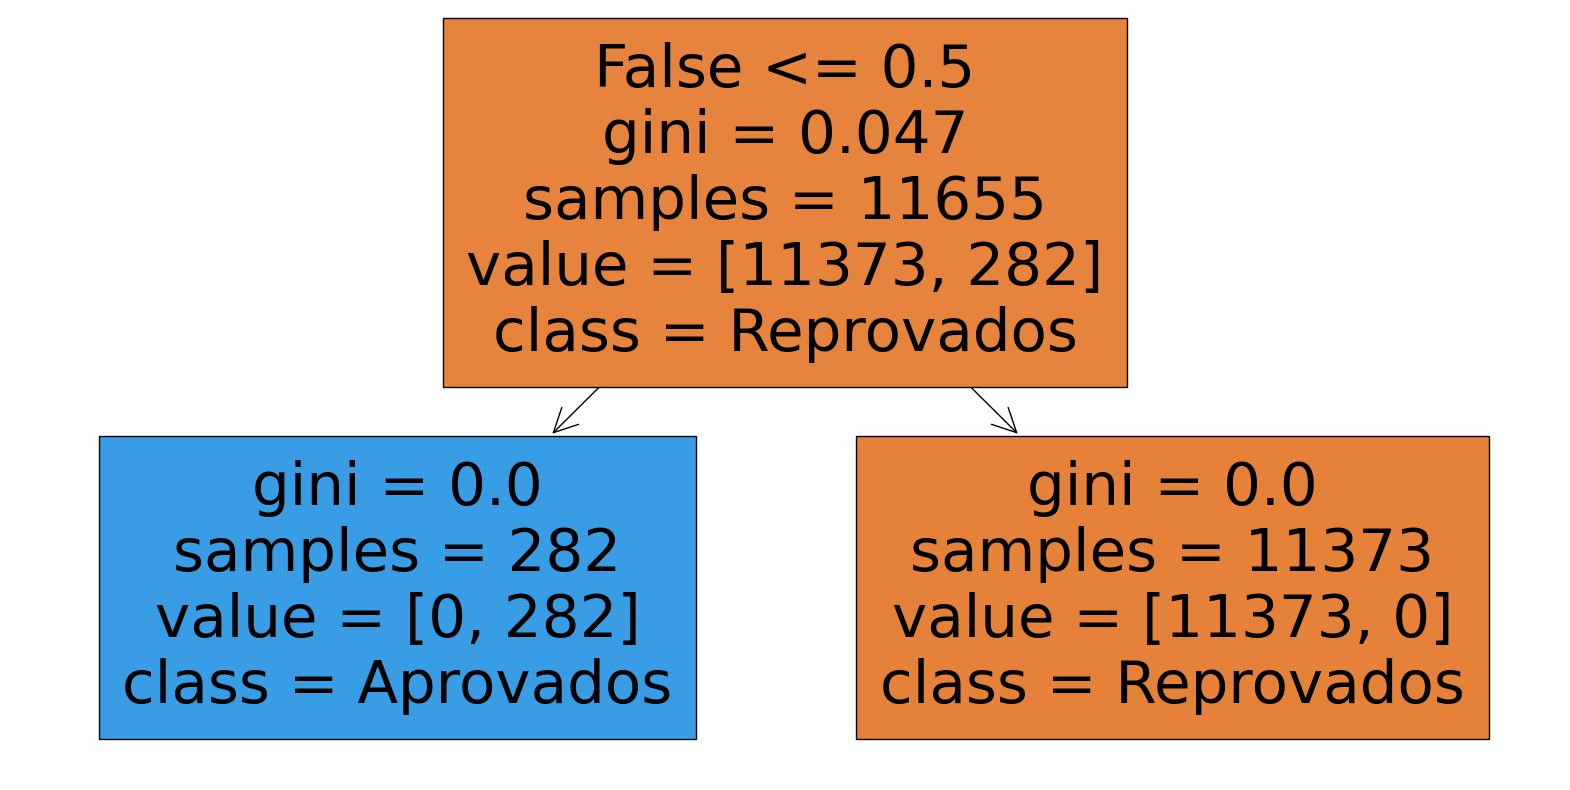

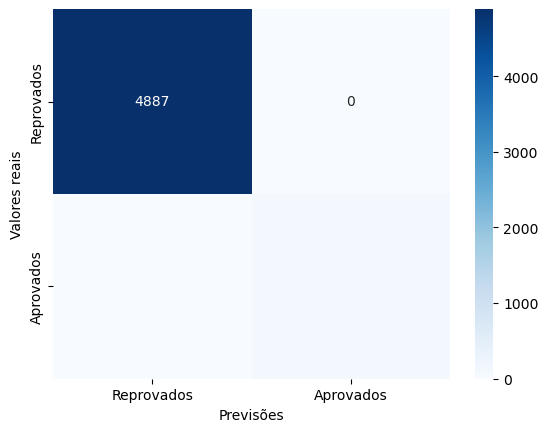

A acurácia do modelo é: 100.00%


In [43]:
# 1
# Definir o objeto com a função
modelo = DecisionTreeClassifier(random_state=42)

# 2
# Treinar o modelo
modelo.fit(X_train, y_train)

# 3
# Plotagem da árvore
plt.figure(figsize=(20,10))
plot_tree(modelo, filled=True, feature_names=y, class_names=["Reprovados", "Aprovados"])
plt.show()

# 4
# Previsões com os dados de validação
previsoes = modelo.predict(X_val)

# Matriz de confusão
matriz_confusao = confusion_matrix(y_val, previsoes)

# Rótulos
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=["Reprovados", "Aprovados"], yticklabels=["Reprovados", "Aprovados"])
plt.xlabel('Previsões')
plt.ylabel('Valores reais')
plt.show()

# 5
# Acurácia
acuracia = accuracy_score(y_val, previsoes)
print(f"A acurácia do modelo é: {acuracia*100:.2f}%")

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [44]:
# 1
# Previsões na base de teste
previsoes_teste = modelo.predict(X_val)

# Matriz de confusão para a base de teste
matriz_confusao_teste = confusion_matrix(y_val, previsoes_teste)

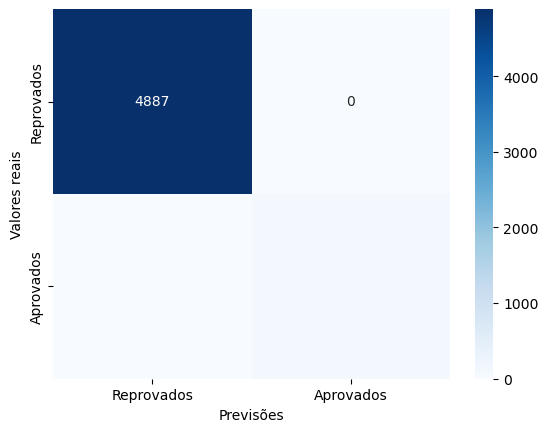

In [45]:
# 2
# Visualização
sns.heatmap(matriz_confusao_teste, annot=True, fmt='d', cmap='Blues', xticklabels=["Reprovados", "Aprovados"], yticklabels=["Reprovados", "Aprovados"])
plt.xlabel('Previsões')
plt.ylabel('Valores reais')
plt.show()

In [46]:
# 3
# Acurácia na base de teste
acuracia_teste = accuracy_score(y_val, previsoes_teste)
print(f"A acurácia do modelo na base de teste é: {acuracia_teste*100:.2f}%")

A acurácia do modelo na base de teste é: 100.00%


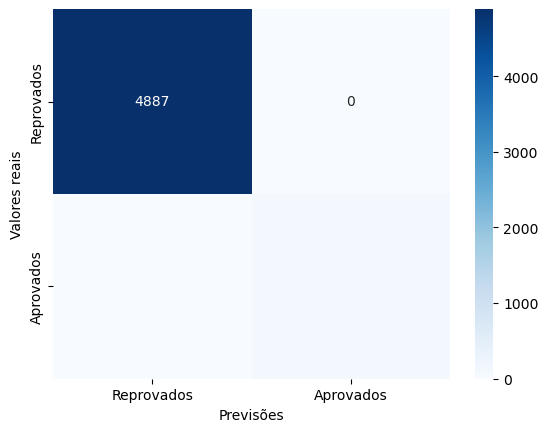

A proporção de proponentes classificados como 'maus' é: 2.16%


In [47]:
# 4
# Novo modelo com restrições
modelo_ajustado = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
modelo_ajustado.fit(X_train, y_train)

# Previsões com o novo modelo
previsoes_ajustado = modelo_ajustado.predict(X_val)

# Matriz de confusão com o novo modelo
matriz_confusao_ajustado = confusion_matrix(y_val, previsoes_ajustado)

# Visualização da matriz de confusão
sns.heatmap(matriz_confusao_ajustado, annot=True, fmt='d', cmap='Blues', xticklabels=["Reprovados", "Aprovados"], yticklabels=["Reprovados", "Aprovados"])
plt.xlabel('Previsões')
plt.ylabel('Valores reais')
plt.show()

# Qual a proporção de prooponentes que foram classificados como "mau"
proporcao_maus = np.mean(previsoes_ajustado == 1)  # 1 = True (mau)
print(f"A proporção de proponentes classificados como 'maus' é: {proporcao_maus*100:.2f}%")

In [48]:
# Simular classificação de todos como 'bons' (0)
previsoes_bons = np.zeros_like(previsoes_teste)

# Calcular a acurácia para essa classificação
acuracia_bons = accuracy_score(y_val, previsoes_bons)
print(f"A acurácia se todos fossem classificados como 'bons' seria: {acuracia_bons*100:.2f}%")

A acurácia se todos fossem classificados como 'bons' seria: 97.84%
